In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [431]:
VGgameDF = pd.read_csv('vgsales.csv')

In [432]:
VGgameDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### 데이터 전처리 - 결측치 제거

In [433]:
VGgameDF = VGgameDF.iloc[:,[2,4,5,6,7,8,10]]

In [434]:
VGgameDF.isnull().sum()

Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Global_Sales     0
dtype: int64

In [435]:
len(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list())

58

In [436]:
VGgameDF.drop(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list(), inplace=True)
VGgameDF.drop(VGgameDF[VGgameDF['Publisher']=='Unknown'].index.to_list(), inplace=True)

C:\Users\kjy19\AppData\Local\Temp\ipykernel_16580\1161423503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF.drop(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list(), inplace=True)
C:\Users\kjy19\AppData\Local\Temp\ipykernel_16580\1161423503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF.drop(VGgameDF[VGgameDF['Publisher']=='Unknown'].index.to_list(), inplace=True)


In [437]:
VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [438]:

Xbox = ['X360', 'XOne', 'XB']  # Xbox 계열
PS =['PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV']  # PlayStation 계열
Nintendo = ['Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC']   # 닌텐도

platforms = [Xbox, PS, Nintendo]
platforms_n = ['Xbox', 'PS', 'Nintendo']

In [439]:
idx = 0
for l in platforms:
    # print(l)
    for p in l:
        # print(p)
        VGgameDF['Platform'] = VGgameDF['Platform'].replace(p,f"{platforms_n[idx]}")
    idx+=1

C:\Users\kjy19\AppData\Local\Temp\ipykernel_16580\264356192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF['Platform'] = VGgameDF['Platform'].replace(p,f"{platforms_n[idx]}")


In [440]:
VGgameDF['Platform'].unique()

array(['Nintendo', 'Xbox', 'PS', 'PC', '2600', 'GEN', 'DC', 'SAT', 'SCD',
       'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [441]:
other = ['PC', '2600', 'GEN', 'DC', 'SAT', 'SCD','WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
for o in other:
    VGgameDF['Platform'] = VGgameDF['Platform'].replace(o,"other")

C:\Users\kjy19\AppData\Local\Temp\ipykernel_16580\480032667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF['Platform'] = VGgameDF['Platform'].replace(o,"other")


In [442]:
VGgameDF['Platform'].unique()

array(['Nintendo', 'Xbox', 'PS', 'other'], dtype=object)

#### 데이터 전처리 - 플랫폼 확인

Text(0.5, 1.0, '플랫폼 별 배급된 게임 수')

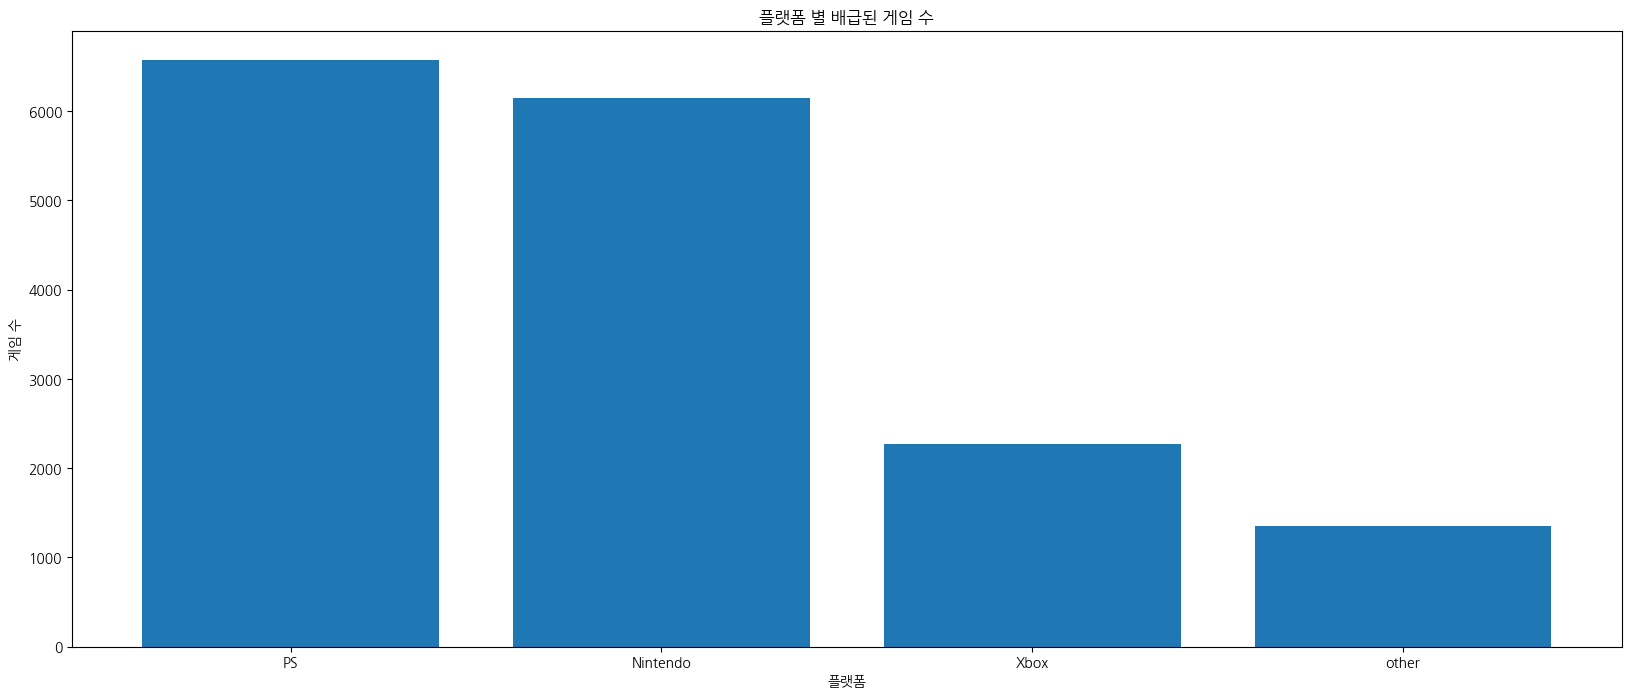

In [443]:
plt.figure(figsize=(20,8))
plt.bar(VGgameDF['Platform'].value_counts().index,VGgameDF['Platform'].value_counts())
plt.xlabel('플랫폼')
plt.ylabel('게임 수')
plt.title('플랫폼 별 배급된 게임 수')


In [444]:
VGgameDF['Platform'].value_counts()

Platform
PS          6573
Nintendo    6144
Xbox        2273
other       1347
Name: count, dtype: int64

In [445]:
VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS,Racing,Activision,0.00,0.00,0.00,0.01
16596,Nintendo,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


#### 데이터 전처리 - 배급처 확인

In [446]:
tempDF = VGgameDF

In [447]:
len(tempDF['Platform'].unique())
# tempDF['Publisher'].unique()

4

In [448]:
# tempDF['Platform'].value_counts() > 15

(tempDF['Publisher'].value_counts()> 15).value_counts()

count
False    467
True     110
Name: count, dtype: int64

In [449]:
VGgameDF['Publisher'].value_counts() 
# VGgameDF['Publisher'][VGgameDF['Publisher']=='Nintendo'].count()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 577, dtype: int64

In [450]:
## 배급처 거름망
# (VGgameDF['Publisher'].value_counts()> 15).value_counts()

gameDF = pd.DataFrame((VGgameDF['Publisher'].value_counts() > 15))
Up_Pub_list = gameDF[gameDF['count']==True].index.to_list()
VGgameDF = VGgameDF[VGgameDF['Publisher'].isin(Up_Pub_list)]

In [451]:
VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16591,other,Adventure,Ubisoft,0.01,0.00,0.00,0.01
16592,Nintendo,Simulation,Destineer,0.01,0.00,0.00,0.01
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01


#### Decision Tree

In [452]:
VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16591,other,Adventure,Ubisoft,0.01,0.00,0.00,0.01
16592,Nintendo,Simulation,Destineer,0.01,0.00,0.00,0.01
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01


In [453]:
# 모듈로딩
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [454]:
targetSR = VGgameDF['Platform']
featureDF = (VGgameDF.iloc[:,[1,2,3,4,5,6]])

In [455]:
targetSR

0        Nintendo
1        Nintendo
2        Nintendo
3        Nintendo
4        Nintendo
           ...   
16591       other
16592    Nintendo
16593    Nintendo
16594    Nintendo
16595          PS
Name: Platform, Length: 14672, dtype: object

In [456]:
# targetSR.reshape(-1,1)

# np.array(targetSR).reshape(-1,1)

In [457]:
# np.array(targetSR).reshape(-1,1).shape


In [458]:
# type(np.array(targetSR).reshape(-1,1))
# print(t)

In [459]:
# lencoder = LabelEncoder()
# lencoder.fit(targetDF)
# lencoder.transform(targetDF)
# targetSR = np.array(targetDF)

##### 플랫폼, 장르 원핫

In [460]:
ohEncoder = OneHotEncoder()

In [461]:
np.array(targetSR).reshape(-1,1)
featureDF = pd.get_dummies(featureDF)
targetSR = pd.get_dummies(targetSR)

In [462]:
print(f'featureDF - shape : {featureDF.shape}, ndim : {featureDF.ndim}')
print(f'targetSR - shape : {targetSR.shape}, ndim : {targetSR.ndim}')
type(targetSR)

featureDF - shape : (14672, 126), ndim : 2
targetSR - shape : (14672, 4), ndim : 2


pandas.core.frame.DataFrame

In [463]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [464]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [465]:
# print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}')
print(f'[dt_model.max_features] {dt_model.max_features_}')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.n_classes_] [2 2 2 2]
[dt_model.max_features] 126
[dt_model.feature_names_in_] ['NA_Sales' 'EU_Sales' 'JP_Sales' 'Global_Sales' 'Genre_Action'
 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc' 'Genre_Platform'
 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing' 'Genre_Shooter'
 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy' 'Publisher_3DO'
 'Publisher_505 Games' 'Publisher_5pb' 'Publisher_ASCII Entertainment'
 'Publisher_Acclaim Entertainment' 'Publisher_Activision'
 'Publisher_Activision Value' 'Publisher_Alchemist' 'Publisher_Aqua Plus'
 'Publisher_Arc System Works' 'Publisher_Atari' 'Publisher_Atlus'
 'Publisher_Avanquest' 'Publisher_BAM! Entertainment'
 'Publisher_Banpresto' 'Publisher_Bethesda Softworks'
 'Publisher_Black Bean Games' 'Publisher_Broccoli' 'Publisher_Capcom'
 'Publisher_ChunSoft' 'Publisher_City Interactive' 'Publisher_Codemasters'
 'Publisher_Compile Heart' 'Publisher_Crave Entertainment'
 'Publisher_D3Publisher' 'Publisher_DTP Entertainment'
 'Publish

In [466]:
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)
print(f'train_score : test_score = {train_score:.4f} : {test_score:.4f}')

train_score : test_score = 0.9495 : 0.6265


예측

In [467]:
# dt_model.predict()
X_new = [[15.0, 11.88, 54.79, 81.67, False, True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,False]]



def pred_ML(X_new):
       y_pred = dt_model.predict(X_new)
       proba = dt_model.predict_proba(X_new)
       if y_pred[0][0] == True:
              y_pred = 'Nintendo'
       elif y_pred[0][1] == True:
              y_pred = 'PS'
       elif y_pred[0][2] == True:
              y_pred = 'Xbox'
       else:
              y_pred = 'other'
       print(y_pred, proba)

pred_ML(X_new)    

PS [array([[1., 0.]]), array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]])]


c:\Users\kjy19\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\kjy19\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


###### 트리 그림

In [468]:
params = {'max_depth':[12,9,4,3],
       'min_samples_leaf' : [5,3,2]}

gscv=GridSearchCV(DecisionTreeClassifier(), 
                  param_grid=params, 
                  refit=True, 
                  return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [12, 9, 4, 3],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [469]:
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] {gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

best_model = gscv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[gscv.best_params_] {'max_depth': 12, 'min_samples_leaf': 3}
[gscv.best_score_] 0.5659748048407749
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=12, min_samples_leaf=3)
[best_model.max_depth] : 12
[best_model.min_samples_leaf] : 3


In [470]:
from sklearn.tree import export_graphviz
export_graphviz(best_model, out_file = 'tree.dot',
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

In [471]:
# import graphviz
# with open('tree.dot') as f:
#     dot_data = f.read()

# graphviz.Source(dot_data)